In [1]:
# This is a python block

# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics

In [4]:
from sklearn.metrics import (
    recall_score,
    confusion_matrix,
    precision_score,
    f1_score,
    accuracy_score,
    classification_report
    
)

# Cargo los Datos

In [5]:
df = pd.read_csv('./dataset_clean.csv', index_col=[0])

- elimino el descriptor a por leakage

In [6]:
df.drop(columns = ["a [ang]"], axis=[1], inplace = True)
df.columns

Index(['Lowest distortion', 'A', 'B', 'Radius A [ang]', 'Radius B [ang]',
       'Formation energy [eV/atom]', 'Stability [eV/atom]',
       'Volume per atom [A^3/atom]', 'Band gap [eV]',
       'Vacancy energy [eV/O atom]', 'Stability (log[eV/atom])',
       'Vacancy energy (log[eV/O atom])', 'Magnetic moment (^2[mu_B])',
       'Valence B_1', 'Valence B_2', 'Valence B_3', 'Valence B_4',
       'Valence B_5', 'Valence B_element not in BV', 'Valence B_not balanced'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5263 entries, 0 to 5328
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lowest distortion                5263 non-null   int64  
 1   A                                5263 non-null   int64  
 2   B                                5263 non-null   int64  
 3   Radius A [ang]                   5263 non-null   float64
 4   Radius B [ang]                   5263 non-null   float64
 5   Formation energy [eV/atom]       5263 non-null   float64
 6   Stability [eV/atom]              5263 non-null   float64
 7   Volume per atom [A^3/atom]       5263 non-null   float64
 8   Band gap [eV]                    5263 non-null   float64
 9   Vacancy energy [eV/O atom]       4914 non-null   float64
 10  Stability (log[eV/atom])         4981 non-null   float64
 11  Vacancy energy (log[eV/O atom])  2096 non-null   float64
 12  Magnetic moment (^2[

# Prepocesamiento

- Resuelvo problemas con descriptores que tienen infinitos

In [8]:
filter = df['Vacancy energy (log[eV/O atom])'] == -np.inf
df['Vacancy energy (log[eV/O atom])'][filter] = np.nan

/tmp/ipykernel_2197/1774103811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vacancy energy (log[eV/O atom])'][filter] = np.nan


In [9]:
filter = df['Stability (log[eV/atom])'] == -np.inf
df['Stability (log[eV/atom])'][filter] = np.nan

/tmp/ipykernel_2197/4054084434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stability (log[eV/atom])'][filter] = np.nan


- nulos 

In [10]:
df.isnull().sum()

Lowest distortion                     0
A                                     0
B                                     0
Radius A [ang]                        0
Radius B [ang]                        0
Formation energy [eV/atom]            0
Stability [eV/atom]                   0
Volume per atom [A^3/atom]            0
Band gap [eV]                         0
Vacancy energy [eV/O atom]          349
Stability (log[eV/atom])            290
Vacancy energy (log[eV/O atom])    3169
Magnetic moment (^2[mu_B])          947
Valence B_1                           0
Valence B_2                           0
Valence B_3                           0
Valence B_4                           0
Valence B_5                           0
Valence B_element not in BV           0
Valence B_not balanced                0
dtype: int64

In [11]:
df.drop('Vacancy energy (log[eV/O atom])', axis=1, inplace= True)

- elimino descriptor que presenta al menos un nulo

In [12]:
df.dropna(inplace=True)

- verifico

In [13]:
df.isnull().sum()

Lowest distortion              0
A                              0
B                              0
Radius A [ang]                 0
Radius B [ang]                 0
Formation energy [eV/atom]     0
Stability [eV/atom]            0
Volume per atom [A^3/atom]     0
Band gap [eV]                  0
Vacancy energy [eV/O atom]     0
Stability (log[eV/atom])       0
Magnetic moment (^2[mu_B])     0
Valence B_1                    0
Valence B_2                    0
Valence B_3                    0
Valence B_4                    0
Valence B_5                    0
Valence B_element not in BV    0
Valence B_not balanced         0
dtype: int64

# Split target y patron

- Utilizando todos los decriptoes

In [14]:
# atributos
x = df.drop('Lowest distortion', axis=1)
# variable obejtivo:
y = df['Lowest distortion']

- forma 

In [15]:
print(x.shape)
print(y.shape)

(3720, 18)
(3720,)


- Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle = True)


In [17]:
print(X_train.shape)
print(X_test.shape)

(2976, 18)
(744, 18)


- Normalizacion

In [18]:
x_st_scaler = StandardScaler() #Creo instancia del scaler
y_st_scaler = StandardScaler() #Creo instancia del scaler
X_train = x_st_scaler.fit_transform(X_train) # escalo train
X_test = x_st_scaler.transform(X_test) #transformo test

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3720 entries, 0 to 5328
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lowest distortion            3720 non-null   int64  
 1   A                            3720 non-null   int64  
 2   B                            3720 non-null   int64  
 3   Radius A [ang]               3720 non-null   float64
 4   Radius B [ang]               3720 non-null   float64
 5   Formation energy [eV/atom]   3720 non-null   float64
 6   Stability [eV/atom]          3720 non-null   float64
 7   Volume per atom [A^3/atom]   3720 non-null   float64
 8   Band gap [eV]                3720 non-null   float64
 9   Vacancy energy [eV/O atom]   3720 non-null   float64
 10  Stability (log[eV/atom])     3720 non-null   float64
 11  Magnetic moment (^2[mu_B])   3720 non-null   float64
 12  Valence B_1                  3720 non-null   int64  
 13  Valence B_2       

# Modelo Regresión Logística con todo el target

In [40]:
from sklearn.linear_model import LogisticRegression

## Búsqueda del modelo óptimo

- Defino función para crear objetos del modelo Logistic Regresion, bajo distintas configuraciones

In [21]:
def logistic_model(C_, solver_, multiclass_):
  model = LogisticRegression(random_state = 42, solver = solver_, multi_class = multiclass_, n_jobs = -1, C = C_)
  return model

- Defino parámetros sobre los cuales iterar

In [22]:
# *** Clases ***
multiclass = ['ovr', 'multinomial']

# *** Algoritmos de solvers *** 
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

# *** Scores y params usados ***
scores = []
params = []

- Itero sobre distintas configuraciones del modelo, buscando cual es la mejor

In [23]:
for algClass in multiclass:
    for algSolver in solver_list:
      
      try:
        #*** Instancio modelo ****        
        model = logistic_model(1, algSolver, algClass)
        
        #*** Entreno modelo con train ****
        model.fit(X_train, y_train)

        #*** Predicción sobre test ****
        predictions = model.predict(X_test)

        #*** Evaluo desemeño comparando con testTarget ***
        accuracy = accuracy_score(y_test, predictions)

        #*** Guardo combinación usada y su score ***
        params.append(algClass + '/' + algSolver)
        scores.append(accuracy)
        
      except:
        # Hay algunas combinaciones no permitidas
        None # En ese caso, que no haga nada

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/s

- Evaluación Gráfica de los modelos

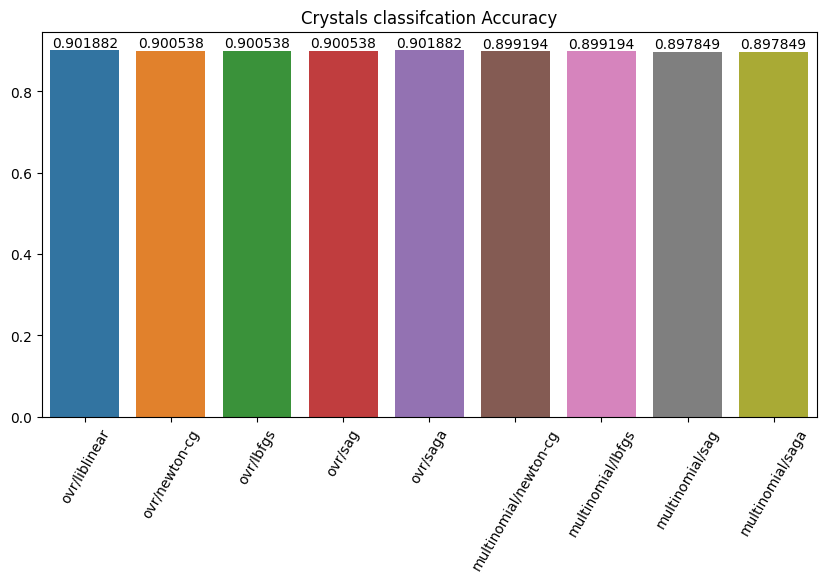

In [24]:
fig = plt.figure(figsize=(10,5))

splot = sns.barplot(x=params, y=scores)

splot.set_title('Crystals classifcation Accuracy')
plt.bar_label(splot.containers[0])
plt.xticks(rotation=60)
plt.show()

## Elección del modelo

- Creo la instancia del modelo

In [25]:
model = logistic_model(1, 'newton-cg', 'ovr')


- Entreno: (newton-cgEs el algoritmo encargado de resolver el problema de clasificación)

In [26]:
model.fit(X_train, y_train)

LogisticRegression(C=1, multi_class='ovr', n_jobs=-1, random_state=42,
                   solver='newton-cg')

- Predigo

In [27]:
y_pred = model.predict(X_test)

# Evaluación del modelo

- Coeficiente de correlación de Matthews

In [28]:
from sklearn.metrics import matthews_corrcoef
coeficiente_mcc = matthews_corrcoef(y_test, y_pred)
coeficiente_mcc

0.7879071496901668

- accuracy

In [29]:
yhat = model.predict(X_test)
accuracy_lr = model.score(X_test, y_test)
print("Logistic Regression accuracy is :", accuracy_lr)

Logistic Regression accuracy is : 0.9005376344086021


- Matriz de confusión

In [30]:
# target
categoricalTarget = ['cubic', 'orthorhombic', 'rhombohedral', 'tetragonal']
numericalTarget = list(range(0,4))

y_test.replace(numericalTarget,categoricalTarget, inplace = True)
y_pred = pd.Series(y_pred)
y_pred.replace(numericalTarget,categoricalTarget, inplace = True)

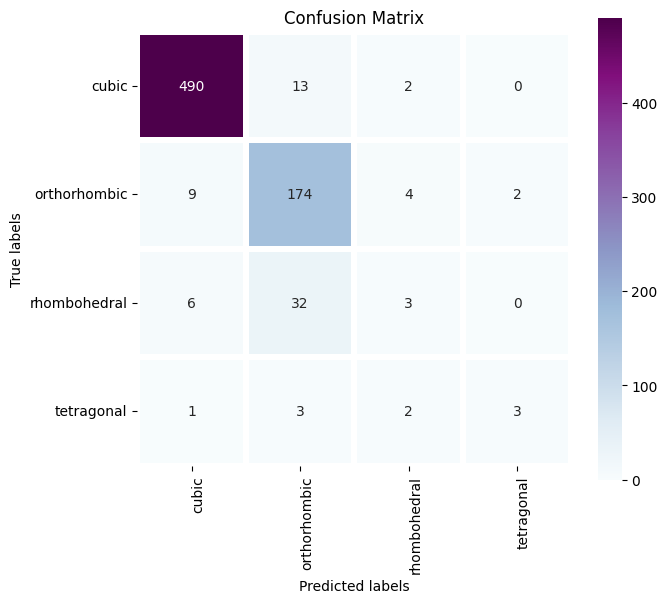

In [31]:
import seaborn as sns
f, ax= plt.subplots()

sns.heatmap(
    confusion_matrix(list(y_test), list(y_pred)), annot=True, fmt="d",square=True, cmap='BuPu', linewidths=3,  ax=ax
)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(categoricalTarget)
ax.yaxis.set_ticklabels(categoricalTarget);

plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=00, ha="right",
         rotation_mode="anchor")

f.set_figheight(6)
f.set_figwidth(7)


In [32]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       cubic       0.97      0.97      0.97       505
orthorhombic       0.78      0.92      0.85       189
rhombohedral       0.27      0.07      0.12        41
  tetragonal       0.60      0.33      0.43         9

    accuracy                           0.90       744
   macro avg       0.66      0.57      0.59       744
weighted avg       0.88      0.90      0.88       744



# Revisemos las probabilidades de las elecciones para la estructura romboédrica

- Veamos la probabilidad de elección de algún elemento predicho como romboédrico

In [33]:
y_pred[y_pred == 'rhombohedral']


36     rhombohedral
49     rhombohedral
74     rhombohedral
133    rhombohedral
193    rhombohedral
276    rhombohedral
332    rhombohedral
349    rhombohedral
492    rhombohedral
580    rhombohedral
650    rhombohedral
dtype: object

In [34]:
probabilidaes = model.predict_proba(X_test)
probabilidaes[650]
#yhat[1]

array([0.03121072, 0.40421133, 0.54463539, 0.01994256])

- Pesos de los coeficietntes de los features que componen el patrón

In [35]:
# Data (coeficintes y nombre correspondiente del feature)
coefs = model.coef_[0]
fNames = x.columns.values

#Dict
weightsDict = {'Weights': coefs, 'Features': fNames}

# DF del Dict

weigths = pd.DataFrame(weightsDict)
weigths.sort_values(['Weights'], ascending=[True], inplace=True)

In [36]:
weightsDict

{'Weights': array([ 0.07579749,  0.20236115,  0.59662915, -0.40058856,  0.783765  ,
         7.86100679,  0.1499946 , -0.06352333,  0.56814508,  0.01388194,
         0.32238734, -0.11468356, -0.12725022, -0.0384329 ,  0.07070678,
         0.16986481,  0.11928327, -0.14450505]),
 'Features': array(['A', 'B', 'Radius A [ang]', 'Radius B [ang]',
        'Formation energy [eV/atom]', 'Stability [eV/atom]',
        'Volume per atom [A^3/atom]', 'Band gap [eV]',
        'Vacancy energy [eV/O atom]', 'Stability (log[eV/atom])',
        'Magnetic moment (^2[mu_B])', 'Valence B_1', 'Valence B_2',
        'Valence B_3', 'Valence B_4', 'Valence B_5',
        'Valence B_element not in BV', 'Valence B_not balanced'],
       dtype=object)}

- Gráfica de los pesos

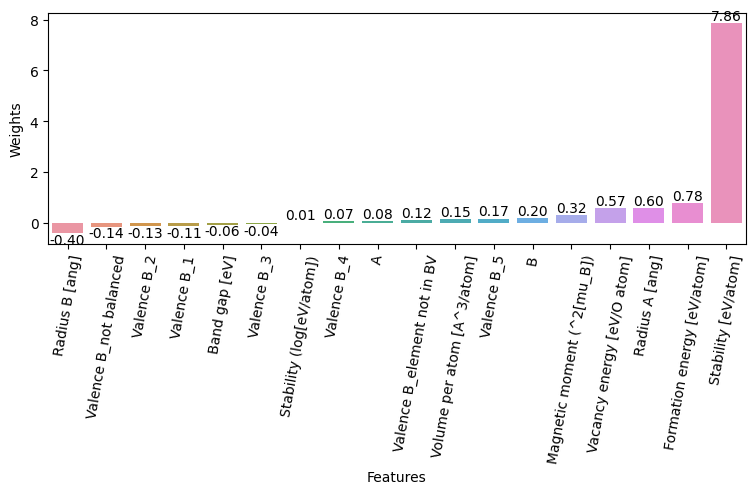

In [37]:
plt.figure(figsize=(9,3))

coefSplot = sns.barplot(data= weigths, x='Features', y='Weights')

plt.bar_label(coefSplot.containers[0],fmt='%.2f')
plt
plt.xticks(rotation=80)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a7ebb3ed-5c94-423a-a3b7-e9cd0209ff98' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>